最小二乗法（回帰分析）の解説動画：
https://www.youtube.com/watch?v=Zz1sgYxrA-k

解説動画：最急降下法(Gradient Descent)の考え方を理解しよう
https://www.youtube.com/watch?v=BO5F2QkFdlI


a = yの共分散/xの分散
b = - a x:xの平均 + y:yの平均
↑最小二乗法の考え方

Oを通る直線の実装
----
>参考URL
https://qiita.com/takubb/items/9e3c207b381c3bdd0787

In [257]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
%matplotlib inline

In [258]:
x = np.array([0,1,2,3,4], dtype=np.float64)
y = np.array([2,6,5,6,9], dtype=np.float64)

In [259]:
#関数の定義
def lr_1(x, y):
    a = np.dot(x, y)/(x**2).sum()
    return a

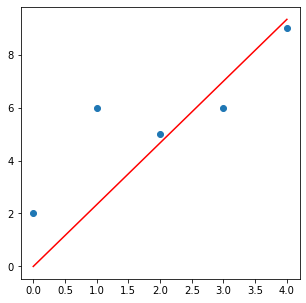

In [260]:
a = lr_1(x, y)
y_ = a*x

plt.figure(figsize=(5,5))
# plt.xlim(xmin=0, xmax=5)
plt.scatter(x,y)
plt.plot(x, y_, c='red')

y= ax + bの定義
----

In [261]:
def lr_2(x, y):
    a_nume = np.dot(x, y) - x.sum() * y.sum()/len(x)
    a_denom = (x**2).sum() - x.sum()**2/len(x)
    a_2 = a_nume/a_denom
    
    b_2 = y.sum() - a*x.sum()/len(x)
    return a_2, b_2

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow class="MJX-TeXAtom-ORD">
    <mtable columnalign="right left right left right left right left right left right left" rowspacing="3pt" columnspacing="0em 2em 0em 2em 0em 2em 0em 2em 0em 2em 0em" displaystyle="true">
      <mtr>
        <mtd>
          <mi>a</mi>
          <mo>=</mo>
          <mstyle displaystyle="true" scriptlevel="0">
            <mfrac>
              <mrow>
                <munderover>
                  <mo>&#x2211;<!-- ∑ --></mo>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mn>1</mn>
                  </mrow>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mi>n</mi>
                  </mrow>
                </munderover>
                <mi>x</mi>
                <mi>y</mi>
                <mo>&#x2212;<!-- − --></mo>
                <mstyle displaystyle="true" scriptlevel="0">
                  <mfrac>
                    <mn>1</mn>
                    <mi>n</mi>
                  </mfrac>
                </mstyle>
                <munderover>
                  <mo>&#x2211;<!-- ∑ --></mo>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mn>1</mn>
                  </mrow>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mi>n</mi>
                  </mrow>
                </munderover>
                <mi>x</mi>
                <munderover>
                  <mo>&#x2211;<!-- ∑ --></mo>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mn>1</mn>
                  </mrow>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mi>n</mi>
                  </mrow>
                </munderover>
                <mi>y</mi>
              </mrow>
              <mrow>
                <munderover>
                  <mo>&#x2211;<!-- ∑ --></mo>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mn>1</mn>
                  </mrow>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mi>n</mi>
                  </mrow>
                </munderover>
                <msup>
                  <mi>x</mi>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mn>2</mn>
                  </mrow>
                </msup>
                <mo>&#x2212;<!-- − --></mo>
                <mstyle displaystyle="true" scriptlevel="0">
                  <mfrac>
                    <mn>1</mn>
                    <mi>n</mi>
                  </mfrac>
                </mstyle>
                <msup>
                  <mrow>
                    <mo>(</mo>
                    <munderover>
                      <mo>&#x2211;<!-- ∑ --></mo>
                      <mrow class="MJX-TeXAtom-ORD">
                        <mn>1</mn>
                      </mrow>
                      <mrow class="MJX-TeXAtom-ORD">
                        <mi>n</mi>
                      </mrow>
                    </munderover>
                    <mi>x</mi>
                    <mo>)</mo>
                  </mrow>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mn>2</mn>
                  </mrow>
                </msup>
              </mrow>
            </mfrac>
          </mstyle>
        </mtd>
      </mtr>
      <mtr>
        <mtd>
          <mi>b</mi>
          <mo>=</mo>
          <mstyle displaystyle="true" scriptlevel="0">
            <mfrac>
              <mn>1</mn>
              <mi>n</mi>
            </mfrac>
          </mstyle>
          <munderover>
            <mo>&#x2211;<!-- ∑ --></mo>
            <mrow class="MJX-TeXAtom-ORD">
              <mn>1</mn>
            </mrow>
            <mrow class="MJX-TeXAtom-ORD">
              <mi>n</mi>
            </mrow>
          </munderover>
          <mrow>
            <mo>(</mo>
            <mi>y</mi>
            <mo>&#x2212;<!-- − --></mo>
            <mi>a</mi>
            <mi>x</mi>
            <mo>)</mo>
          </mrow>
        </mtd>
      </mtr>
    </mtable>
  </mrow>
</math>

- Σは行列　.sum　によって計算きるということがわかった。
- n　は xのlenによって求まることがわかった。!

[スクリーンショット 2021-02-04 13.17.12.png](attachment:59e5cb44-357a-4928-8152-88e0103a05d3.png)
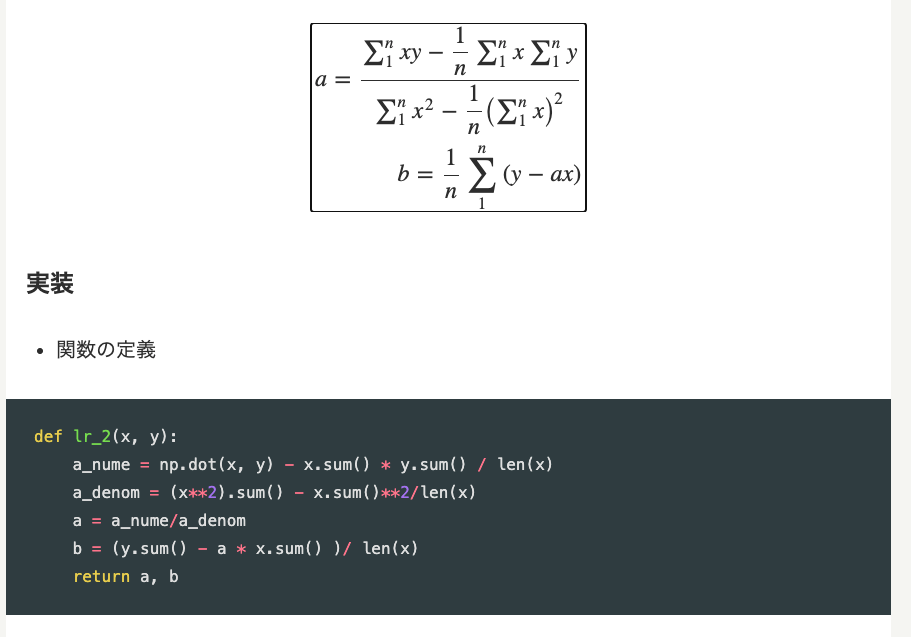

In [262]:
x_2 = np.array([0,1,2,3,4], dtype=np.float64)
y_2 = np.array([2,6,5,6,9], dtype=np.float64)

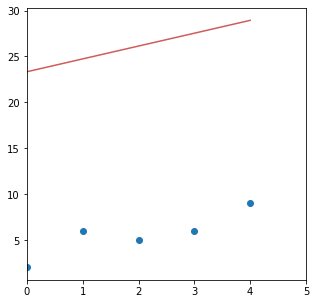

In [263]:
a_2, b_2 = lr_2(x_2, y_2)
y_3 = a_2*x_2 + b_2

plt.figure(figsize=(5,5))
plt.xlim(xmin=0, xmax=5)
plt.scatter(x_2, y_2)
plt.plot(x_2, y_3, c='indianred')

<link href="https://kevinburke.bitbucket.io/markdowncss/markdown.css" rel="stylesheet"></link>
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>h</mi>
    <mi>&#x03B8;<!-- θ --></mi>
  </msub>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <msub>
    <mi>&#x03B8;<!-- θ --></mi>
    <mn>0</mn>
  </msub>
  <msub>
    <mi>x</mi>
    <mn>0</mn>
  </msub>
  <mo>+</mo>
  <msub>
    <mi>&#x03B8;<!-- θ --></mi>
    <mn>1</mn>
  </msub>
  <msub>
    <mi>x</mi>
    <mn>1</mn>
  </msub>
  <mo>+</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>+</mo>
  <msub>
    <mi>&#x03B8;<!-- θ --></mi>
    <mi>j</mi>
  </msub>
  <msub>
    <mi>x</mi>
    <mi>j</mi>
  </msub>
  <mo>+</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>+</mo>
  <msub>
    <mi>&#x03B8;<!-- θ --></mi>
    <mi>n</mi>
  </msub>
  <msub>
    <mi>x</mi>
    <mi>n</mi>
  </msub>
  <mo>.</mo>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>x</mi>
    <mn>0</mn>
  </msub>
  <mo>=</mo>
  <mn>1</mn>
  <mo stretchy="false">)</mo>
  <mspace linebreak="newline" />
</math>

【問題1】仮定関数
----
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

In [264]:
x_task = np.array([0,1,2,3], dtype=np.float64)
theta = np.array([[2,6,5,6],[9,10,8,12],[10,15,13,15]],dtype=np.float64)

print(x_task)
print(theta)

[0. 1. 2. 3.]
[[ 2.  6.  5.  6.]
 [ 9. 10.  8. 12.]
 [10. 15. 13. 15.]]


In [265]:
def _linear_hypothesis(x, y):
    a = np.dot(x, y.T)
    return a

_linear_hypothesis(x_task, theta)

array([34., 62., 86.])

【問題2】最急降下法
----
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。


<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>&#x03B8;<!-- θ --></mi>
    <mi>j</mi>
  </msub>
  <mo>:=</mo>
  <msub>
    <mi>&#x03B8;<!-- θ --></mi>
    <mi>j</mi>
  </msub>
  <mo>&#x2212;<!-- − --></mo>
  <mi>&#x03B1;<!-- α --></mi>
  <mfrac>
    <mn>1</mn>
    <mi>m</mi>
  </mfrac>
  <munderover>
    <mo>&#x2211;<!-- ∑ --></mo>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>1</mn>
    </mrow>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>m</mi>
    </mrow>
  </munderover>
  <mo stretchy="false">[</mo>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>h</mi>
    <mi>&#x03B8;<!-- θ --></mi>
  </msub>
  <mo stretchy="false">(</mo>
  <msup>
    <mi>x</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mo stretchy="false">(</mo>
      <mi>i</mi>
      <mo stretchy="false">)</mo>
    </mrow>
  </msup>
  <mo stretchy="false">)</mo>
  <mo>&#x2212;<!-- − --></mo>
  <msup>
    <mi>y</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mo stretchy="false">(</mo>
      <mi>i</mi>
      <mo stretchy="false">)</mo>
    </mrow>
  </msup>
  <mo stretchy="false">)</mo>
  <msubsup>
    <mi>x</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>j</mi>
    </mrow>
    <mrow class="MJX-TeXAtom-ORD">
      <mo stretchy="false">(</mo>
      <mi>i</mi>
      <mo stretchy="false">)</mo>
    </mrow>
  </msubsup>
  <mo stretchy="false">]</mo>
</math>

参考URL:
https://www.medi-08-data-06.work/entry/grad_desc_reg

In [266]:
import numpy as np
import matplotlib.pyplot as plt

最急降下法の原理
----

6.0
5.94
5.881200000000001
5.823576000000001
5.767104480000001
5.711762390400001
5.657527142592001
5.604376599740161
5.552289067745358
5.501243286390451
5.4512184206626415
5.4021940522493885
5.354150171204401
5.307067167780312
5.260925824424706
5.215707307936212
5.1713931617774875
5.1279652985419375
5.085405992571099
5.043697872719677
5.002823915265283
4.962767436959978
4.923512088220779
4.885041846456363
4.847341009527236
4.810394189336692
4.774186305549958
4.738702579438959
4.70392852785018
4.669849957293176
4.636452958147313
4.6037238989843665
4.571649421004679
4.540216432584585
4.509412103932894
4.479223861854236
4.449639384617152
4.420646596924809
4.392233664986312
4.364388991686586
4.337101211852854
4.310359187615797
4.284152003863481
4.258468963786211
4.233299584510487
4.208633592820277
4.184460920963872
4.1607717025445945
4.137556268493703
4.114805143123829
4.092509040261352
4.070658859456125
4.049245682267002
4.028260768621662
4.007695553249229
3.9875416421842442
3.96779080934

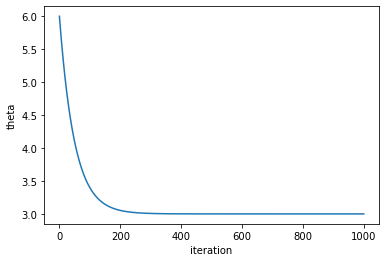

In [267]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

alpha = 0.01 #学習率
itera = 1000 #繰り返し回数(パラメータ更新回数)
theta_lis = np.zeros(itera) #更新ごとにパラメータを格納するためのもの

theta = 6 #thetaの初期値

#繰り返し処理
for i in range(itera):
    theta_lis[i] = theta
    theta = theta - alpha*(2*theta-6)
    print(theta_lis[i])

plt.plot(theta_lis)
plt.ylabel("theta")
plt.xlabel("iteration")
plt.show()

最急降下法を使った単回帰モデル
---
さて、お次は視覚的にも理解しやすい単回帰モデルを例に最急降下法を使ってパラメーターを求めてみましょう。単回帰モデルのパラメーター（切片と傾き）は最小二乗法で求められます。

In [268]:
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data,columns=boston.feature_names)
boston = load_boston()
data = pd.DataFrame(boston.data,columns=boston.feature_names)

print(data["RM"])
print(boston.target)

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50

In [269]:
# y = np.array([10,20,30,40], dtype=np.float64)

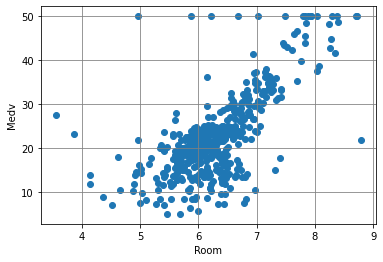

In [270]:
plt.grid(which='major',color='gray',linestyle='-')
plt.scatter(data["RM"],boston.target)
plt.xlabel("Room")
plt.ylabel("Medv")
plt.show()

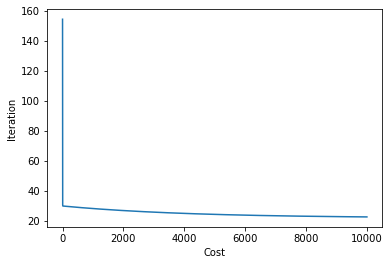

In [271]:
X = data['RM']
y = boston.target

alpha = 0.01 #進捗度
itera = 10000  #繰り返しの回数
cost = np.zeros(itera) #更新ごとにパラメータを格納するためのもの
theta0 = 1 #theta0の初期値
theta1 = 1 #theta1の初期値
m = len(y)

for i in range(itera):
    cost[i] = (1/(2*m))*np.sum(np.square(theta0+theta1*X-y)) #np.squareは配列の２乗
    temp0 =theta0 - alpha*(1/(m))*np.sum(theta0+theta1*X-y)
    temp1 =theta1 - alpha*(1/(m))*np.sum((theta0+theta1*X-y)*X)
    
    theta0 = temp0
    theta1 = temp1
    
plt.plot(cost)
plt.xlabel("Cost")
plt.ylabel("Iteration")
plt.show()

傾きと切片を明確にする
---

In [272]:
print(theta0) #切片
print(theta1) #傾き

-23.83796634157492
7.399160785850576


それを描画する
----

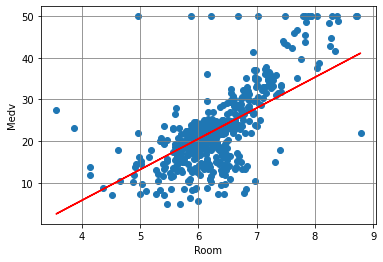

In [273]:
plt.grid(which='major',color='gray',linestyle='-')
plt.scatter(data["RM"],boston.target)
plt.plot(data["RM"],theta0+theta1*data["RM"],color="red")
plt.xlabel("Room")
plt.ylabel("Medv")
plt.show()

【問題3】推定
---
>推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。
仮定関数 $h_\theta(x)$ の出力が推定結果です。

自作で予測の式を作成
---

In [274]:
def predict(x):
    y = np.dot(theta1, x) + theta0
    return y
predict(X)

array([24.81151583, 23.67204506, 29.3250039 , 27.94136084, 29.04383579,
       23.73863751, 20.6457883 , 21.82965403, 17.82670804, 20.58659502,
       23.34648199, 20.62359082, 19.73569153, 20.17964117, 21.26731781,
       19.32873768, 20.07605292, 20.48300677, 16.53185491, 18.53702748,
       17.37535924, 20.29802775, 21.60767921, 19.17335531, 19.99466215,
       17.5899349 , 19.17335531, 20.90475893, 24.21958296, 25.54403274,
       18.43343923, 21.08973795, 20.18704033, 18.3446493 , 21.26731781,
       20.0612546 , 19.38053181, 19.44712426, 20.30542691, 24.95949904,
       28.13373902, 26.25435218, 21.80745655, 22.1182213 , 21.06754047,
       18.20406524, 18.97357797, 20.7789732 , 16.11010274, 17.61213238,
       20.28322942, 21.40790186, 24.33796954, 20.54220005, 19.72829237,
       29.7985502 , 23.39087695, 26.59471357, 21.62987669, 20.01685964,
       18.64061573, 20.30542691, 23.93101569, 26.19515889, 28.72567188,
       22.702755  , 18.98097713, 19.65430076, 17.55293909, 19.70

In [282]:
class ScratchLinearRegression():
    
    def __init__(self, alpha, itera):
        #ハイパーパラメータを属性として記録
        self.alpha = alpha #進捗度
        self.itera = itera  #繰り返しの回数
        self.m = len(y)
        self.a = ''
        self.b = ''
        self.cost = ''
        self.predict_cost = ''
        
#         self.iter = num_iter
#         self.lr = lr
#         self.no_bias = no_bias
#         self.verbose = verbose
        # 損失を記録する配列を用意
#         self.loss = np.zeros(self.iter)
#         self.val_loss = np.zeros(self.iter)
    
    def fit(self, X, y):#最急降下法をもちいたa及びｂの推定をおこなった。
        self.cost = np.zeros(self.itera) #更新ごとにパラメータを格納するためのもの
        theta0 = 1 #theta0の初期値
        theta1 = 1 #theta1の初期値
        for i in range(self.itera):
            self.cost[i] = (1/(2*self.m))*np.sum(np.square(theta0+theta1*X-y)) #np.squareは配列の２乗
            theta0 =theta0 - self.alpha*(1/(self.m))*np.sum(theta0+theta1*X-y)
            theta1 =theta1 - self.alpha*(1/(self.m))*np.sum((theta0+theta1*X-y)*X)
            
            print('途中確認：回数{}'.format(self.itera))
            print('途中確認：進捗度{}'.format(self.alpha))
            print('途中確認：データの個数{}'.format(self.m))
            
            self.b = temp0 #切片
            self.a = temp1 #傾き
            
            return self.b, self.a, self.cost#傾き
            
    def predict(self, x_test):
        y_pred = np.dot(self.a, x_test) + self.b
        print('切片は{}'.format(self.a))
        print('傾きは{}'.format(self.b))
        return y_pred
    
    
    def predict_cost(y_origin, y_pred):
        self.predict_cost = np.zeros(len(self.itera))
        for i in range(self.itera):
            d1 = y_origin - y_pred #正解と予測の差
            self.predict_cost[i] = (1/2*m)*d1.dot(d1)**2
            return seif.predict_cost
    def lerning_carve(self):
        plt.plot(self.cost)
        plt.plot(self.predict_cost)
        plt.xlabel("Cost")
        plt.ylabel("Iteration")
        return plt.show()
    
    

X = np.array(data["RM"])
print(X)
y = np.array(boston.target)
print(y)
lr = ScratchLinearRegression(alpha=0.01, itera=1000)
#予測モデルを作成
lr.fit(X,y)

#予測
y_pred = lr.predict(X)

#予測値の確認
print('予測値の確認{}'.format(y_pred))

#予測の答え
print('予測値の答え{}'.format(y))

print('MSEは{}'.format(mean_squared_error(y, y_pred)))


[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 6.51  6.25  7.489 7.802 8.375 5.8

【問題4】平均二乗誤差
----
>線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。
平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。
平均二乗誤差は以下の数式で表されます。

$$$
L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

𝑚 : 入力されるデータの数


ℎ𝜃() : 仮定関数


𝑥(𝑖) : i番目のサンプルの特徴量ベクトル


𝑦(𝑖) : i番目のサンプルの正解値


なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9

In [283]:
def MSE(y, y_pred):
    d1 = y - y_pred #正解と予測の差
    m = len(y_pred) #サンプルの個数
    mse = (1/m)*d1.dot(d1) # N is int(len(y))
    return mse

In [284]:
print('MSEは{}'.format(MSE(y, y_pred)))
print('Sklearn_MSEは{}'.format(mean_squared_error(y, y_pred)))

MSEは45.046348387568834
Sklearn_MSEは45.04634838756885


【問題5】目的関数
---
>以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。
目的関数（損失関数） 𝐽(𝜃) は次の式です。

$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

In [285]:
def MSE_2(y, y_pred):
    m = len(y_pred) #サンプルの個数
    mse_2 = np.zeros(len(y_pred))
    for i in range(m):
        d1 = y - y_pred #正解と予測の差
        mse_2[i] = (1/2*m)*d1.dot(d1)**2 
        
    return mse_2

MSE_2は[1.31443991e+11 1.31443991e+11 1.31443991e+11 1.31443991e+11
 1.31443991e+11 1.31443991e+11 1.31443991e+11 1.31443991e+11
 1.31443991e+11 1.31443991e+11 1.31443991e+11 1.31443991e+11
 1.31443991e+11 1.31443991e+11 1.31443991e+11 1.31443991e+11
 1.31443991e+11 1.31443991e+11 1.31443991e+11 1.31443991e+11
 1.31443991e+11 1.31443991e+11 1.31443991e+11 1.31443991e+11
 1.31443991e+11 1.31443991e+11 1.31443991e+11 1.31443991e+11
 1.31443991e+11 1.31443991e+11 1.31443991e+11 1.31443991e+11
 1.31443991e+11 1.31443991e+11 1.31443991e+11 1.31443991e+11
 1.31443991e+11 1.31443991e+11 1.31443991e+11 1.31443991e+11
 1.31443991e+11 1.31443991e+11 1.31443991e+11 1.31443991e+11
 1.31443991e+11 1.31443991e+11 1.31443991e+11 1.31443991e+11
 1.31443991e+11 1.31443991e+11 1.31443991e+11 1.31443991e+11
 1.31443991e+11 1.31443991e+11 1.31443991e+11 1.31443991e+11
 1.31443991e+11 1.31443991e+11 1.31443991e+11 1.31443991e+11
 1.31443991e+11 1.31443991e+11 1.31443991e+11 1.31443991e+11
 1.31443991e+11 1.

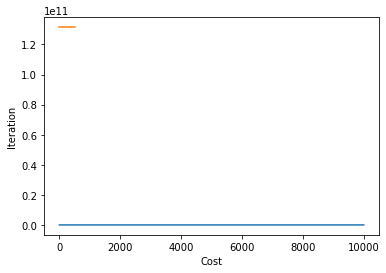

In [286]:
print('MSE_2は{}'.format(MSE_2(y, y_pred)))

plt.plot(cost)
plt.plot(MSE_2(y, y_pred))
plt.xlabel("Cost")
plt.ylabel("Iteration")
plt.show()

【問題6】学習と推定
----
>機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。
scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [287]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split #テストデータと訓練データを分けるためのメソッド
from sklearn import metrics


X = np.array(data["RM"]).reshape(-1,1)

y = np.array(boston.target).reshape(-1,1)

lr_sc = ScratchLinearRegression(alpha=0.01, itera=1000)
lr = linear_model.LinearRegression()


#予測モデルを作成
lr_sc.fit(X,y)
lr.fit(X,y)

#予測
y_pred_sc = lr_sc.predict(X)
y_pred = lr.predict(X)

#予測の評価
print('スクラッチのMSEは{}'.format(mean_squared_error(y, y_pred_sc)))
print('SklearのMSEは{}'.format(mean_squared_error(y, y_pred)))

途中確認：回数1000
途中確認：進捗度0.01
途中確認：データの個数506
切片は7.399160785850576
傾きは-23.83796634157492
スクラッチのMSEは45.04634838756885
SklearのMSEは43.60055177116956


【問題7】学習曲線のプロット
---
>学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。
線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

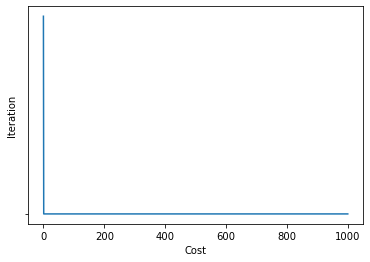

In [288]:
lr_sc.lerning_carve()